In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakr

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
import os

# Data

In [7]:
import imghdr
import cv2


In [8]:
import matplotlib

In [9]:
from matplotlib import pyplot as plt

In [10]:
data_dir = 'data'

In [11]:
image_exts = ['jpeg']

In [12]:
os.listdir(os.path.join(data_dir, 'Food'))

['707880.jpg',
 '242124.jpg',
 '241405.jpg',
 '709073.jpg',
 '735749.jpg',
 '738245.jpg',
 '214969.jpg',
 '733853.jpg',
 '215478.jpg',
 '214014.jpg',
 '733660.jpg',
 '215450.jpg',
 '215451.jpg',
 '737349.jpg',
 '215479.jpg',
 '235024.jpg',
 '241969.jpg',
 '735748.jpg',
 '734330.jpg',
 '235232.jpg',
 '241404.jpg',
 '215055.jpg',
 '213418.jpg',
 '710494.jpg',
 '708542.jpg',
 '241612.jpg',
 '215243.jpg',
 '737567.jpg',
 '213626.jpg',
 '734046.jpg',
 '242455.jpg',
 '708998.jpg',
 '235178.jpg',
 '213801.jpg',
 '709306.jpg',
 '708018.jpg',
 '734939.jpg',
 '214822.jpg',
 '214188.jpg',
 '214163.jpg',
 '215269.jpg',
 '737565.jpg',
 '241610.jpg',
 '242872.jpg',
 '242127.jpg',
 '710496.jpg',
 '213354.jpg',
 '737808.jpg',
 '213591.jpg',
 '733313.jpg',
 '234847.jpg',
 '241943.jpg',
 '215484.jpg',
 '213778.jpg',
 '213744.jpg',
 '241764.jpg',
 '213750.jpg',
 '213988.jpg',
 '214759.jpg',
 '213989.jpg',
 '733662.jpg',
 '214758.jpg',
 '215334.jpg',
 '214943.jpg',
 '734694.jpg',
 '736518.jpg',
 '733312.j

In [13]:
img_food = cv2.imread(os.path.join('data', 'Food', '213415.jpg'))

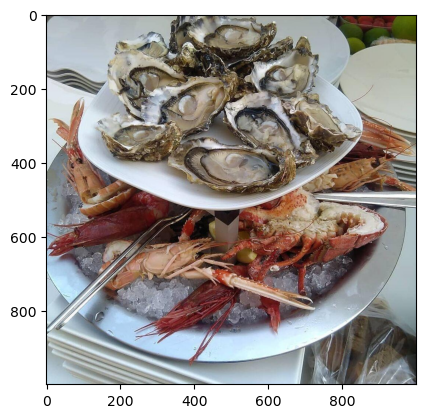

In [14]:
plt.imshow(cv2.cvtColor(img_food,cv2.COLOR_BGR2RGB))
plt.show()

# load data

In [15]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [16]:
import numpy as np

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1198 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [21]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [22]:
#changing classes to 1 or 0
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

In [23]:
#checking which class is 1 or 0


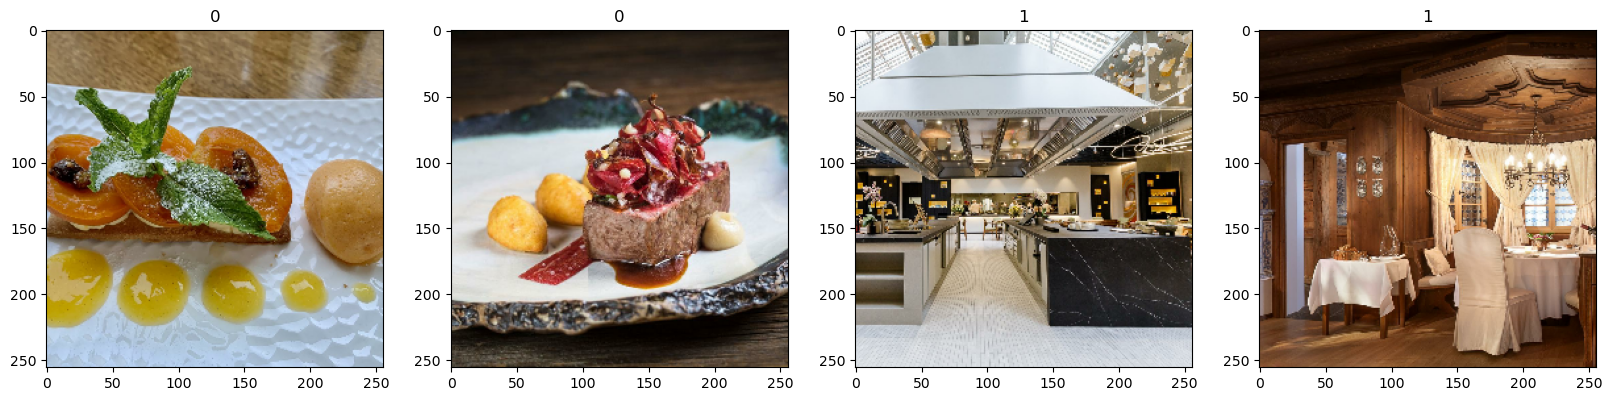

In [24]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#1 is interior, 0 is food

# preprocess data

## scale data

In [25]:
batch[0].max()

255.0

In [26]:
data = data.map(lambda x,y: (x/255, y))
#speeds up the process (smaller values)
#x is image, y is target variable

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

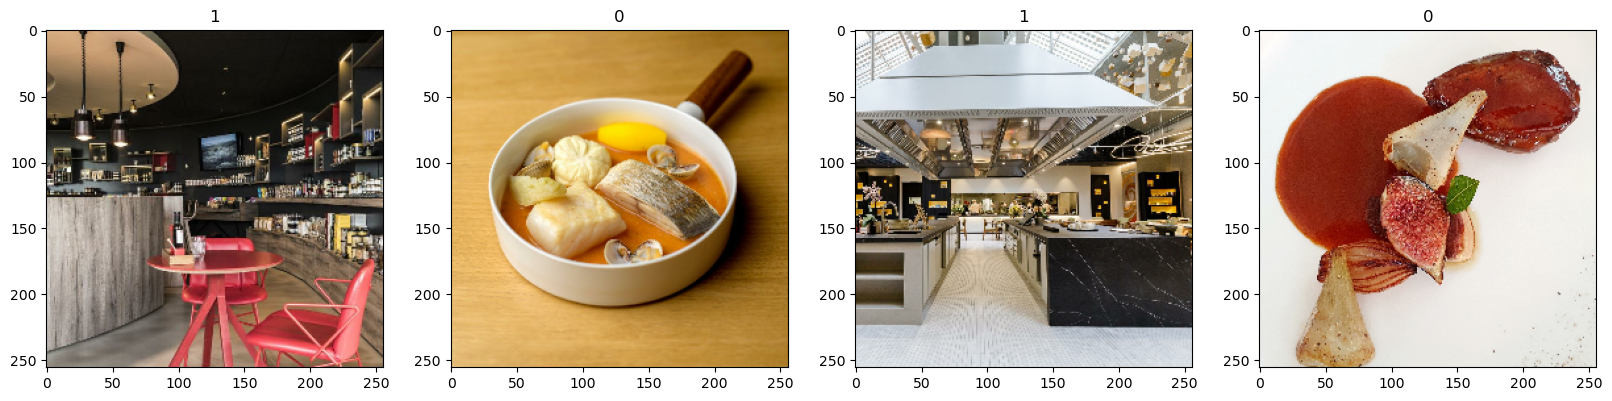

In [30]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## split data

In [31]:
len(data)
#38 batches of 32 pictures

38

In [32]:
train_size = int(len(data)* .7) #to train the deep learning model
val_size = int(len(data)* .2) #to evaluate the model while we are training
test_size = int(len(data)* .1) #for final evaluation

In [33]:
#no overlap in batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Model 

## Build Deep Learning Model

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (256, 256, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [38]:
for layer in base_model.layers:
    layer.trainable = False

In [40]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [41]:

# Compile the model before training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

## Train the model

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Train the model using the dataset
vgghist = model.fit(train, validation_data = val, epochs = 10)

In [ ]:
vgghist

## Plot the performance 

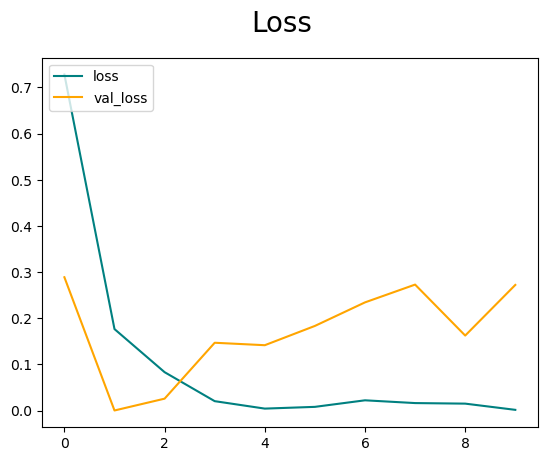

In [47]:
fig = plt.figure()
plt.plot(vgghist.history['loss'], color='teal', label='loss')
plt.plot(vgghist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

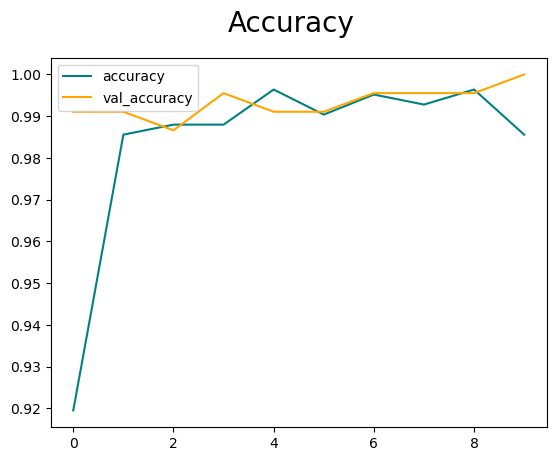

In [42]:
fig = plt.figure()
plt.plot(vgghist.history['accuracy'], color='teal', label='accuracy')
plt.plot(vgghist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate performance

## Evaluate 

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-24 16:59:30.137588: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1198]
	 [[{{node Placeholder/_0}}]]
2023-05-24 16:59:30.138079: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1198]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 3s 3s/step


In [46]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9782609, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9895833, shape=(), dtype=float32)


In [47]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.97826087474823, Recall:1.0, Accuracy:0.9895833134651184


## Test

In [48]:
import cv2

In [1]:
#a test image not used before
img = cv2.imread('foodtest3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'cv2' is not defined

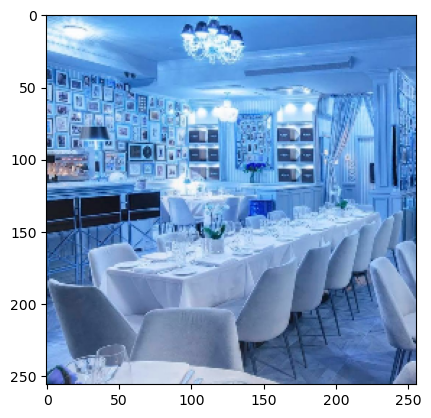

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 133ms/step


In [77]:
yhat
#1 is interior, 0 is food

array([[1.]], dtype=float32)

In [78]:
if yhat > 0.5: 
    print(f'Predicted class is Interior')
else:
    print(f'Predicted class is Food')

Predicted class is Interior


# Saving the model

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('models','imageclassifier.h5'))

/Users/henricoorevits/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [155]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [156]:
new_model

In [157]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


array([[0.99679685]], dtype=float32)